In [2]:
import pandas as pd
import numpy as np

In [3]:
# Nalozi podatke
players = pd.read_csv("players_22.csv")

C:\Users\vidag\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
players.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential    value_eur  wage_eur  age  ...   lcb    cb   rcb  \
0       93         93   78000000.0  320000.0   34  ...  50+3  50+3  50+3   
1       92         92  119500000.0  270000.0   32  ...  60+3  60+3  60+3   
2       91         91   45000000.0  270000.0   36  ...  53+3  53+3  53+3   
3       91         91  129000000.0  270000.0   29  ...  50+3  50+3  50+3   
4       91         91  125500000.0  350000.0   30  ...  69+3  69+3  69+3   

     rb    gk                                    player_face_url  \
0  61+3  19+3  https://cdn.sofifa.net/players/158/023/22_120.png   
1  61+3  19+3  https://cdn.sofifa.net/players/188/545/22_120.png   
2  60+3  20+3  https://cdn.sofifa.net/players/020/801/22_120.png   
3  62+3  20+3  https://cdn.sofifa.net/players/190/871/22_120.png   
4  75+3  21+3  https://cdn.sofifa.net/players/192/985/22_120.png   

                            club_logo_url  \
0  https://cdn.sofifa.net/teams/73/60.png   
1  https://cdn.sofifa.net/teams/21/60.png   
2  https://cdn.sofifa.net/teams/11/60.png   
3  https://cdn.sofifa.net/teams/73/60.png   
4  https://cdn.sofifa.net/teams/10/60.png   

                             club_flag_url  \
0      https://cdn.sofifa.net/flags/fr.png   
1      https://cdn.sofifa.net/flags/de.png   
2  https://cdn.sofifa.net/flags/gb-eng.png   
3      https://cdn.sofifa.net/flags/fr.png   
4  https://cdn.sofifa.net/flags/gb-eng.png   

                            nation_logo_url  \
0  https://cdn.sofifa.net/teams/1369/60.png   
1  https://cdn.sofifa.net/teams/1353/60.png   
2  https://cdn.sofifa.net/teams/1354/60.png   
3                                       NaN   
4  https://cdn.sofifa.net/teams/1325/60.png   

                       nation_flag_url  
0  https://cdn.sofifa.net/flags/ar.png  
1  https://cdn.sofifa.net/flags/pl.png  
2  https://cdn.sofifa.net/flags/pt.png  
3  https://cdn.sofifa.net/flags/br.png  
4  https://cdn.sofifa.net/flags/be.png  

[5 rows x 110 columns]

In [5]:
# Izberemo atribute za grucenje
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [6]:
# Izlocimo vrstice, ki imajo manjkajoce vrednosti
players = players.dropna(subset=features)

In [7]:
# Skopiraj podatke v nov dataframe
data = players[features].copy()

# Psevdokoda


Koraki, ki jih bomo izvedli:
1. Skaliraj podatke, da bodo vsi atributi imeli vrednosti na isti skali - s tem se izognemo, da bi kateri izmed atributov imel premoc nad drugimi/bi bil obravnavan kot da je pomembnejsi
2. Inicializiraj nakljucne centroide
3. Oznaci vsako vrstico glede na to, kateremu centroidu je najblizja/mu pripada
4. Izracunaj nove centroide
5. Izrisi gruce s centroidi
6. Ponovi korake 3-5 dokler se centroidi ne nehajo spreminjati


In [8]:
# Skaliramo podatke
# Pazimo, da izracun izvedemo tako, da ohranimo varianco iz originalnih podatkov
data = ((data - data.min())/(data.max() - data.min()))*9 + 1

In [9]:
# Pogledamo opis podatkov
data.describe()

overall     potential      wage_eur     value_eur           age
count  19165.000000  19165.000000  19165.000000  19165.000000  19165.000000
mean       4.670472      5.319998      1.219443      1.131826      4.063345
std        1.346635      1.191076      0.501528      0.353229      1.575838
min        1.000000      1.000000      1.000000      1.000000      1.000000
25%        3.739130      4.521739      1.012876      1.021620      2.666667
50%        4.717391      5.304348      1.064378      1.044817      4.000000
75%        5.500000      6.086957      1.193133      1.092370      5.333333
max       10.000000     10.000000     10.000000     10.000000     10.000000

In [10]:
# Poglejmo nekaj vrstic podatkov
data.head()

overall  potential   wage_eur  value_eur       age
0  10.000000   9.608696   9.227468   4.618307  7.000000
1   9.804348   9.413043   7.939914   6.543654  6.333333
2   9.608696   9.217391   7.939914   3.087308  7.666667
3   9.608696   9.217391   7.939914   6.984396  5.333333
4   9.608696   9.217391  10.000000   6.822018  5.666667

In [11]:
# Inicializacija centroidov (nakljucno)
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
#        centroid
        # shrani v seznam centroidov
        centroids.append(centroid)
    return pd.concat(centroids, axis=1) #zdruzimo posamezne sezname v dataframe

In [12]:
# Poglejmo nase centroide
centroids = random_centroids(data, 4)

In [13]:
centroids

0         1         2         3
overall    4.717391  5.891304  3.543478  2.760870
potential  5.304348  6.673913  5.891304  5.304348
wage_eur   1.167382  1.010300  1.090129  1.347639
value_eur  1.277946  1.110928  1.007005  1.059895
age        5.000000  4.333333  4.666667  3.333333

In [14]:
# Oznaci (label) vsako vrstico kateremu centroidu pripada/je najblizji

def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x)**2).sum(axis=1)))
    #poiscemo indeks najmanjse vrednosti v vsaki vrstici in ga vrnemo
    return distances.idxmin(axis=1)
    

In [15]:
labels = get_labels(data, centroids)
labels

0        1
1        1
2        1
3        1
4        1
        ..
19234    3
19235    3
19236    3
19237    3
19238    3
Length: 19165, dtype: int64

In [16]:
labels.value_counts()

0    7609
3    6225
1    5174
2     157
dtype: int64

In [17]:
# Update centroidov glede na geomerijsko povprecje primerov, ki pripadajo posameznemu centroidu

def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids


In [18]:
new_centroids(data, labels, 4)

0         1         2         3
overall    4.785732  6.021320  4.373925  3.176026
potential  4.587338  6.629400  5.567715  4.886094
wage_eur   1.108544  1.481350  1.062870  1.028830
value_eur  1.043265  1.319481  1.058416  1.026416
age        5.231552  3.738816  3.432336  2.504978

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [22]:
# risanje gruc
def plot_clusters(data, labels, centroids, iteration):
    # najprej zmanjsamo dimenzije v 2-dimenziji, da bomo lahko izrisali podatke
    # uporabimo lahko npr. PCA
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    # izbrisi risalno plosco
    clear_output(wait=True)
    plt.title(f'Iteration{iteration}') #nastavi naslov slike
    # izrisi podatke in nato se centroide
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1], c="red")
    plt.show()

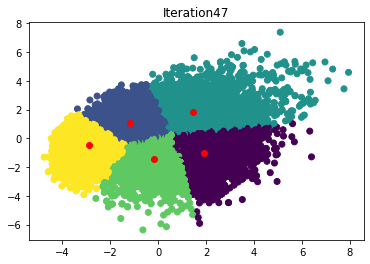

In [23]:
max_iterations = 100
centroid_count = 5

#najprej inicializiramo nakljucne centroide
centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

# zanko bomo izvajali, dokler ne dosezemo najvecje stevilo iteracij oz. 
# vse dokler se vrednosti centroidov spreminjajo - ko se nehajo spreminjati smo zakljucili
while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [24]:
# Oglejmo si koncne centroide
centroids

0         1         2         3         4
overall    5.498820  4.255796  6.416643  4.190205  2.500383
potential  5.130930  5.880758  6.787504  4.103136  4.371940
wage_eur   1.217140  1.068536  1.659670  1.053503  1.016086
value_eur  1.074111  1.060266  1.445138  1.030187  1.013179
age        6.074025  2.623854  3.927137  4.698651  2.338164

In [25]:
# In se koliko primerov je v posameznem centroidu
labels.value_counts()

1    5034
3    4455
0    3853
2    3236
4    2587
dtype: int64

In [26]:
# Izpisi igralce v centroidu 2
players[labels == 2][["short_name"] + features]

short_name  overall  potential  wage_eur    value_eur  age
0              L. Messi       93         93  320000.0   78000000.0   34
1        R. Lewandowski       92         92  270000.0  119500000.0   32
2     Cristiano Ronaldo       91         91  270000.0   45000000.0   36
3             Neymar Jr       91         91  270000.0  129000000.0   29
4          K. De Bruyne       91         91  350000.0  125500000.0   30
...                 ...      ...        ...       ...          ...  ...
6364      V. Lisakovich       69         77   20000.0    3100000.0   23
6376       M. Al-Tamari       69         75    7000.0    2200000.0   24
6794        O. Custodio       68         73    5000.0    1600000.0   26
6795         J. Fuentes       68         73    5000.0    1600000.0   26
7319          Sori Mané       68         75    5000.0    2200000.0   25

[3236 rows x 6 columns]

In [27]:
# Primerjajmo zdaj naš algoritem z vgrajenim
from sklearn.cluster import KMeans

In [29]:
kmeans = KMeans(5)
kmeans.fit(data)

KMeans(n_clusters=5)

In [30]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

0         1         2         3         4
overall    4.221865  4.918663  5.659862  7.073669  2.976013
potential  4.063530  6.094816  5.299046  7.271173  4.843267
wage_eur   1.051382  1.145553  1.267229  2.264359  1.021150
value_eur  1.027541  1.094516  1.085736  1.893060  1.019073
age        4.994904  3.120894  6.066938  4.339842  2.446346